In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from matplotlib import gridspec
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from cartopy.util import add_cyclic_point
from scipy.stats import linregress
import cmaps
from scipy.stats import f
from scipy.stats import t
import statsmodels.tsa.api as smt

In [33]:
def effective_freedom(x, y, r):
    if np.isnan(r):
        p_value = np.nan
        df_residual = np.nan
    else:
        n = len(x)
        rx = smt.stattools.acf(x, nlags = n)
        ry = smt.stattools.acf(y, nlags = n)
        tsum = np.sum(rx*ry)
        df_residual = round(n/tsum)
        t_value = r * np.sqrt(df_residual) / np.sqrt(1 - r**2)
        p_value = 2*(1-t.cdf(x=np.abs(t_value), df=df_residual))
    return p_value, df_residual

In [34]:
data1 = xr.open_dataset('F:\\hwchen\\output\\data\\6type_3exp_fsds_fsa_fira_lh_h.nc')
data2 = xr.open_dataset('F:\\hwchen\\output\\data\\3type_diff_fsh_fira_et_h2osoi_cldlow.nc')
data3 = xr.open_dataset('F:\\hwchen\\output\\data\\6type_3exp_tsa_tmax_tmin_dtr.nc')
ds = xr.open_dataset('F:\\hwchen\\LUCC_exp\\surfdata.pftdyn_1.9x2.5_rcp4.5_simyr1850-2100_c130422.nc')
land = ds['LANDFRAC_PFT'].values



fsa = data1['fsa'].mean('exp').mean('month').values
et = data2['et'].mean('month').values
tmax = data3['tmax'].mean('exp').mean('month').values
tmin = data3['tmin'].mean('exp').mean('month').values



fsa = fsa[2, ...]
et = et[2, ...]
tmax = tmax[2, ...]
tmin = tmin[2, ...]

In [35]:
rr_tmax_fsa = np.zeros((tmax.shape[1], tmax.shape[2]))
rr_tmax_et = np.zeros((tmax.shape[1], tmax.shape[2]))
rr_tmin_fsa = np.zeros((tmax.shape[1], tmax.shape[2]))
rr_tmin_et = np.zeros((tmax.shape[1], tmax.shape[2]))
pp_tmax_fsa = np.zeros((tmax.shape[1], tmax.shape[2]))
pp_tmax_et = np.zeros((tmax.shape[1], tmax.shape[2]))
pp_tmin_fsa = np.zeros((tmax.shape[1], tmax.shape[2]))
pp_tmin_et = np.zeros((tmax.shape[1], tmax.shape[2]))
df_tmax_fsa = np.zeros((tmax.shape[1], tmax.shape[2]))
df_tmax_et = np.zeros((tmax.shape[1], tmax.shape[2]))
df_tmin_fsa = np.zeros((tmax.shape[1], tmax.shape[2]))
df_tmin_et = np.zeros((tmax.shape[1], tmax.shape[2]))
for i in np.arange(tmax.shape[1]):
    for j in np.arange(tmax.shape[2]):
        _, _, rr_tmax_fsa[i, j], _, _ = linregress(tmax[:, i, j], fsa[:, i, j])
        _, _, rr_tmax_et[i, j], _, _ = linregress(tmax[:, i, j], et[:, i, j])
        _, _, rr_tmin_fsa[i, j], _, _ = linregress(tmin[:, i, j], fsa[:, i, j])
        _, _, rr_tmin_et[i, j], _, _ = linregress(tmin[:, i, j], et[:, i, j])
        pp_tmax_fsa[i, j], df_tmax_fsa[i, j] = effective_freedom(tmax[:, i, j], fsa[:, i, j], rr_tmax_fsa[i, j])
        pp_tmax_et[i, j], df_tmax_et[i, j] = effective_freedom(tmax[:, i, j], et[:, i, j], rr_tmax_et[i, j])
        pp_tmin_fsa[i, j], df_tmin_fsa[i, j] = effective_freedom(tmin[:, i, j], fsa[:, i, j], rr_tmin_fsa[i, j])
        pp_tmin_et[i, j], df_tmin_et[i, j] = effective_freedom(tmin[:, i, j], et[:, i, j], rr_tmin_et[i, j])

plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size']= 16

C:\Users\陈虹玮\AppData\Local\Temp\ipykernel_8636\985459442.py:175: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(c1, cax=fig.add_axes([0.252, 0.12, 0.525, 0.018]), orientation='horizontal', aspect=10, drawedges=True, extend='both', extendrect=True, extendfrac='auto')


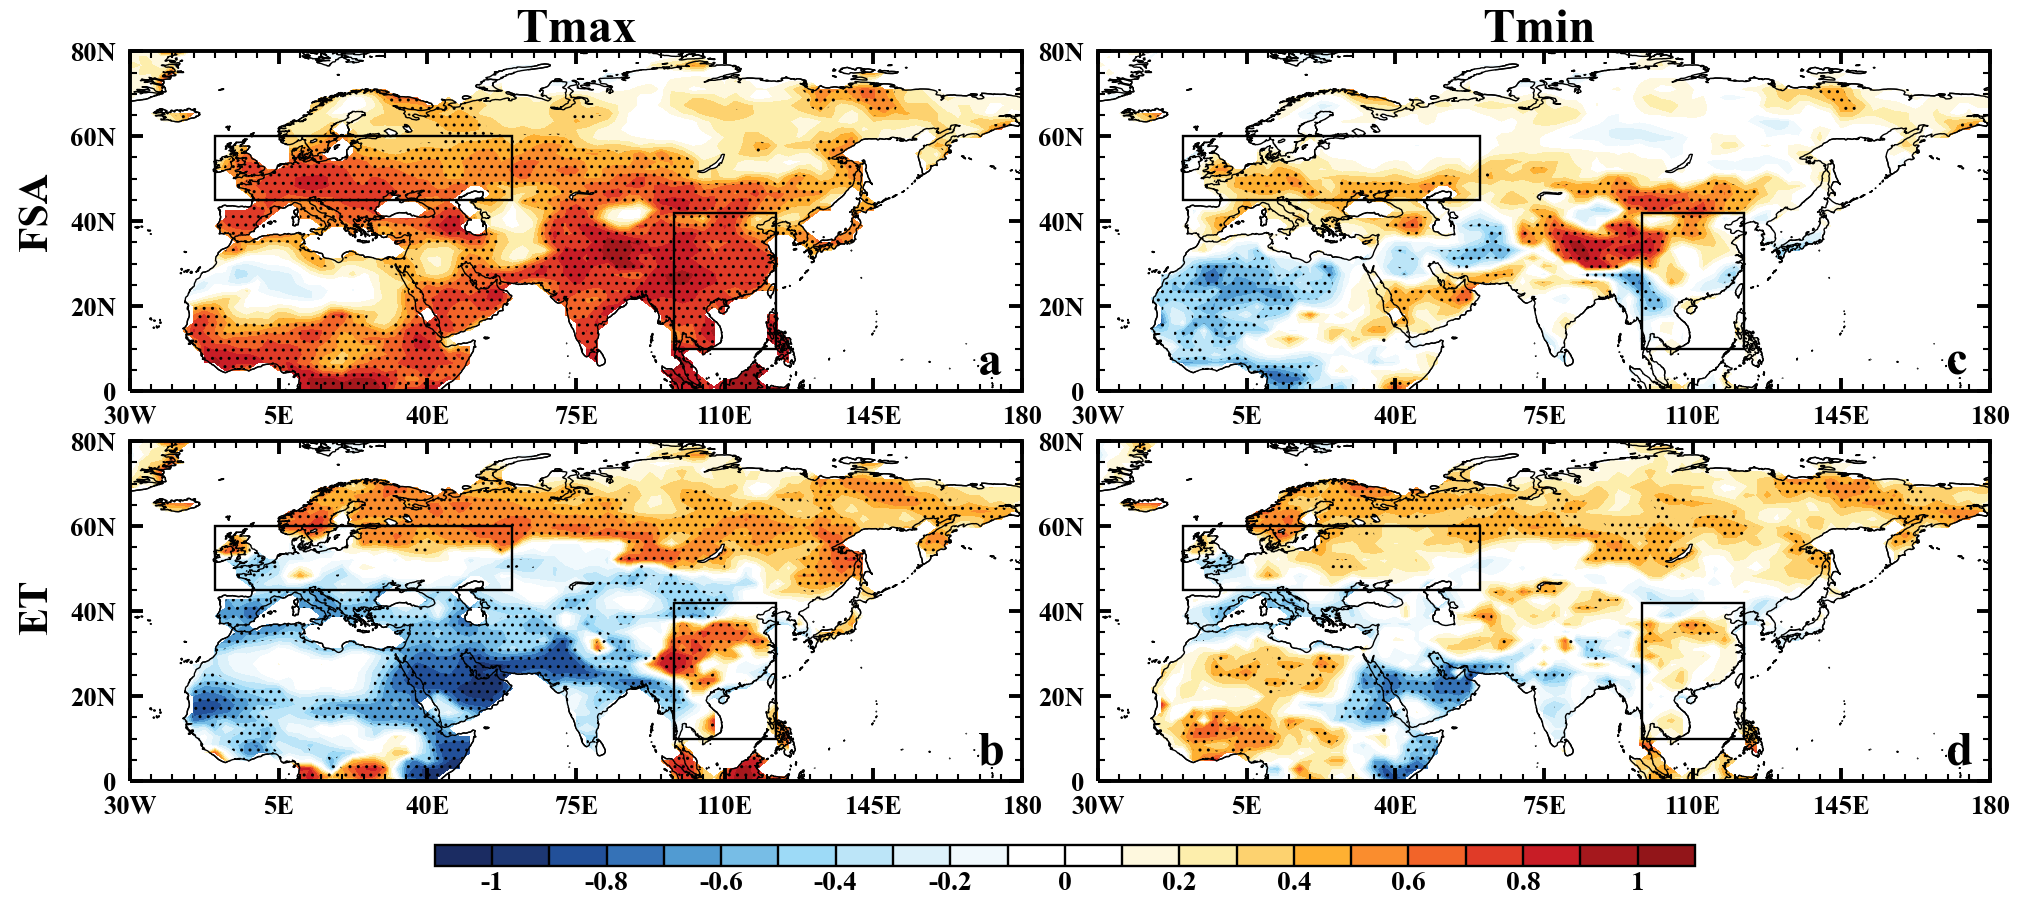

In [38]:
lonmin, lonmax = -30., 180.
latmin, latmax = 0., 80.
lon, lat = data1.lon, data1.lat



rr_tmax_fsa_nan = np.where(land > 0.3, rr_tmax_fsa, np.nan)
cycle_rr_tmax_fsa, cycle_lon = add_cyclic_point(rr_tmax_fsa_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
pp_tmax_fsa_nan = np.where(land > 0.3, pp_tmax_fsa, np.nan)
cycle_pp_tmax_fsa, cycle_lon = add_cyclic_point(pp_tmax_fsa_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
fig = plt.figure(figsize=(24, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.085, hspace=-0.27)
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c1 = ax.contourf(cycle_lon, cycle_lat, cycle_rr_tmax_fsa, transform=ccrs.PlateCarree(), cmap=cmaps.BlueWhiteOrangeRed, levels=np.arange(-1, 1.1, 0.1), extend='both')
c1p = ax.contourf(cycle_lon, cycle_lat, cycle_pp_tmax_fsa, [0, 0.01], hatches=['..'], colors="none", transform=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeat.LAKES.with_scale('110m'),edgecolor='k',facecolor='white',linewidth=1)
ax.add_feature(cfeat.OCEAN.with_scale('50m'), lw=1, facecolor='white', edgecolor='black')
ax.set_xticks([-30, 5, 40, 75, 110, 145, 180], crs=ccrs.PlateCarree())
ax.set_yticks([0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='', zero_direction_label=False)
lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis="both", which='major', width=2.8, length=9.5, direction='in', right=True, top=True, pad=10)
ax.tick_params(axis="both", which='minor', width=1.5, length=5, direction='in', right=True, top=True)
ax.tick_params(tick2On=True, label2On=False)
ax.spines['geo'].set_linewidth(2.8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.text(0.95, 0.05, f'a', fontsize=35, transform=ax.transAxes)
ax.set_title('Tmax', fontsize=35, weight='bold')
ax.title.set_position((0.5, 1.08))



rr_tmin_fsa_nan = np.where(land > 0.3, rr_tmin_fsa, np.nan)
cycle_rr_tmin_fsa, cycle_lon = add_cyclic_point(rr_tmin_fsa_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
pp_tmin_fsa_nan = np.where(land > 0.3, pp_tmin_fsa, np.nan)
cycle_pp_tmin_fsa, cycle_lon = add_cyclic_point(pp_tmin_fsa_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=0))
ax2.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c1 = ax2.contourf(cycle_lon, cycle_lat, cycle_rr_tmin_fsa, transform=ccrs.PlateCarree(), cmap=cmaps.BlueWhiteOrangeRed, levels=np.arange(-1, 1.1, 0.1), extend='both')
c1p = ax2.contourf(cycle_lon, cycle_lat, cycle_pp_tmin_fsa, [0, 0.01], hatches=['..'], colors="none", transform=ccrs.PlateCarree())
ax2.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=1)
ax2.add_feature(cfeat.LAKES.with_scale('110m'),edgecolor='k',facecolor='white',linewidth=1)
ax2.add_feature(cfeat.OCEAN.with_scale('50m'), lw=1, facecolor='white', edgecolor='black')
ax2.set_xticks([-30, 5, 40, 75, 110, 145, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='', zero_direction_label=False)
lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis="both", which='major', width=2.8, length=9.5, direction='in', right=True, top=True, pad=10)
ax2.tick_params(axis="both", which='minor', width=1.5, length=5, direction='in', right=True, top=True)
ax2.tick_params(tick2On=True, label2On=False)
ax2.spines['geo'].set_linewidth(2.8)
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator(5))
ax2.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
ax2.add_patch(rect1)
ax2.add_patch(rect2)
plt.text(0.95, 0.05, f'c', fontsize=35, transform=ax2.transAxes)
ax2.set_title('Tmin', fontsize=35, weight='bold')
ax2.title.set_position((0.495, 1.08))



rr_tmax_et_nan = np.where(land > 0.3, rr_tmax_et, np.nan)
cycle_rr_tmax_et, cycle_lon = add_cyclic_point(rr_tmax_et_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
pp_tmax_et_nan = np.where(land > 0.3, pp_tmax_et, np.nan)
cycle_pp_tmax_et, cycle_lon = add_cyclic_point(pp_tmax_et_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
ax3 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax3.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c1 = ax3.contourf(cycle_lon, cycle_lat, cycle_rr_tmax_et, transform=ccrs.PlateCarree(), cmap=cmaps.BlueWhiteOrangeRed, levels=np.arange(-1, 1.1, 0.1), extend='both')
c1p = ax3.contourf(cycle_lon, cycle_lat, cycle_pp_tmax_et, [0, 0.01], hatches=['..'], colors="none", transform=ccrs.PlateCarree())
ax3.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=1)
ax3.add_feature(cfeat.LAKES.with_scale('110m'),edgecolor='k',facecolor='white',linewidth=1)
ax3.add_feature(cfeat.OCEAN.with_scale('50m'), lw=1, facecolor='white', edgecolor='black')
ax3.set_xticks([-30, 5, 40, 75, 110, 145, 180], crs=ccrs.PlateCarree())
ax3.set_yticks([0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='', zero_direction_label=False)
lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis="both", which='major', width=2.8, length=9.5, direction='in', right=True, top=True, pad=10)
ax3.tick_params(axis="both", which='minor', width=1.5, length=5, direction='in', right=True, top=True)
ax3.tick_params(tick2On=True, label2On=False)
ax3.spines['geo'].set_linewidth(2.8)
ax3.xaxis.set_minor_locator(MultipleLocator(5))
ax3.yaxis.set_minor_locator(MultipleLocator(5))
ax3.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
ax3.add_patch(rect1)
ax3.add_patch(rect2)
plt.text(0.95, 0.05, f'b', fontsize=35, transform=ax3.transAxes)



rr_tmin_et_nan = np.where(land > 0.3, rr_tmin_et, np.nan)
cycle_rr_tmin_et, cycle_lon = add_cyclic_point(rr_tmin_et_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
pp_tmin_et_nan = np.where(land > 0.3, pp_tmin_et, np.nan)
cycle_pp_tmin_et, cycle_lon = add_cyclic_point(pp_tmin_et_nan, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=0))
ax4.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c1 = ax4.contourf(cycle_lon, cycle_lat, cycle_rr_tmin_et, transform=ccrs.PlateCarree(), cmap=cmaps.BlueWhiteOrangeRed, levels=np.arange(-1, 1.1, 0.1), extend='both')
c1p = ax4.contourf(cycle_lon, cycle_lat, cycle_pp_tmin_et, [0, 0.01], hatches=['..'], colors="none", transform=ccrs.PlateCarree())
ax4.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=1)
ax4.add_feature(cfeat.LAKES.with_scale('110m'),edgecolor='k',facecolor='white',linewidth=1)
ax4.add_feature(cfeat.OCEAN.with_scale('50m'), lw=1, facecolor='white', edgecolor='black')
ax4.set_xticks([-30, 5, 40, 75, 110, 145, 180], crs=ccrs.PlateCarree())
ax4.set_yticks([0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='', zero_direction_label=False)
lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
ax4.tick_params(axis="both", which='major', width=2.8, length=9.5, direction='in', right=True, top=True, pad=10)
ax4.tick_params(axis="both", which='minor', width=1.5, length=5, direction='in', right=True, top=True)
ax4.tick_params(tick2On=True, label2On=False)
ax4.spines['geo'].set_linewidth(2.8)
ax4.xaxis.set_minor_locator(MultipleLocator(5))
ax4.yaxis.set_minor_locator(MultipleLocator(5))
ax4.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.7, zorder = 5,transform=ccrs.PlateCarree())
ax4.add_patch(rect1)
ax4.add_patch(rect2)
plt.text(0.95, 0.05, f'd', fontsize=35, transform=ax4.transAxes)



ax5 = fig.add_axes([0.075, 0.51, 0.01, 0.284])
ax5.axis('off')
ax5.text(0.4, 0.46, 'FSA', fontsize=30, weight='bold', rotation=90)
ax6 = fig.add_axes([0.075, 0.19, 0.01, 0.284])
ax6.axis('off')
ax6.text(0.4, 0.46, 'ET', fontsize=30, weight='bold', rotation=90)



cbar = fig.colorbar(c1, cax=fig.add_axes([0.252, 0.12, 0.525, 0.018]), orientation='horizontal', aspect=10, drawedges=True, extend='both', extendrect=True, extendfrac='auto')
cbar.ax.tick_params(color='black', width=1.7, direction='out', length=0, labelsize=20)
cbar.dividers.set_linewidth(1.7)
cbar.outline.set_linewidth(1.7)
tick_locs = np.arange(-1, 1.1, 0.1)
tick_labels = ['-1', '', '-0.8', '', '-0.6', '', '-0.4', '', '-0.2', '', '0', '', '0.2', '', '0.4', '', '0.6', '', '0.8', '', '1']
cbar.set_ticks(ticks=tick_locs)
cbar.set_ticklabels(tick_labels)
# plt.savefig(f'F:\\hwchen\\radiation_et_correlation\\picture\\effective_freedom.png', bbox_inches='tight')